In [1]:
!unzip archive\ \(2\).zip

Archive:  archive (2).zip
  inflating: UCI_Credit_Card.csv     


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import ML utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")  # change filename if needed

# Separate features and target
X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]

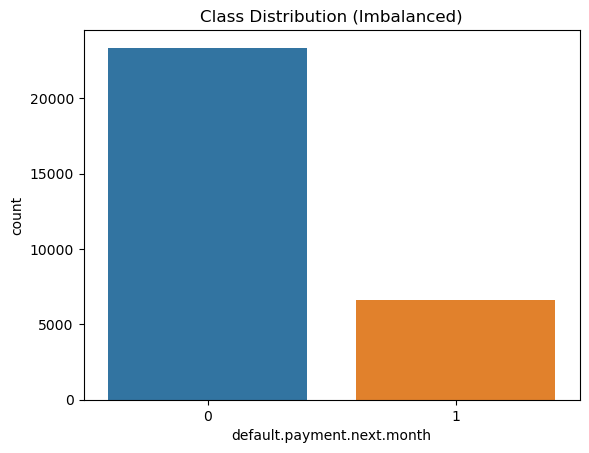

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64


In [3]:

# Visualize class imbalance
sns.countplot(x=y)
plt.title("Class Distribution (Imbalanced)")
plt.show()

print(y.value_counts())


In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
# Apply feature scaling (required for KNN)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Before SMOTE
Accuracy: 0.7935
Precision: 0.553012048192771
Recall: 0.3458929917106255


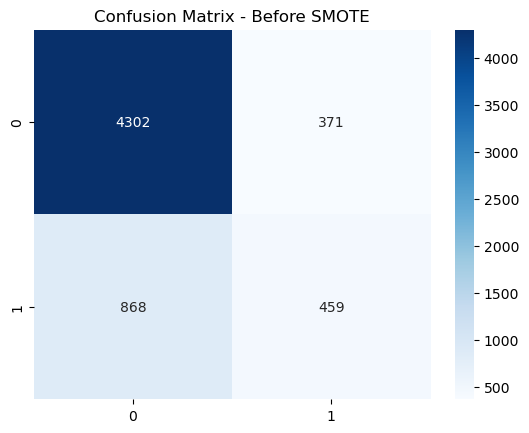

In [6]:
# Train KNN on original imbalanced data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled) # Predict on test data (before SMOTE)

# Evaluate performance before SMOTE
acc_before = accuracy_score(y_test, y_pred)
prec_before = precision_score(y_test, y_pred)
rec_before = recall_score(y_test, y_pred)

print("Before SMOTE")
print("Accuracy:", acc_before)
print("Precision:", prec_before)
print("Recall:", rec_before)

# Confusion matrix before SMOTE
cm_before = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_before, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Before SMOTE")
plt.show()

In [7]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_scaled, y_train
)

print("After SMOTE class distribution:")
print(pd.Series(y_train_smote).value_counts())

After SMOTE class distribution:
default.payment.next.month
0    18691
1    18691
Name: count, dtype: int64


In [10]:
# Train KNN on balanced data
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred_smote = knn_smote.predict(X_test_scaled)


In [11]:
# Evaluate performance after SMOTE
acc_after = accuracy_score(y_test, y_pred_smote)
prec_after = precision_score(y_test, y_pred_smote)
rec_after = recall_score(y_test, y_pred_smote)

print("After SMOTE")
print("Accuracy:", acc_after)
print("Precision:", prec_after)
print("Recall:", rec_after)


After SMOTE
Accuracy: 0.6556666666666666
Precision: 0.3433658329800763
Recall: 0.6103993971363979


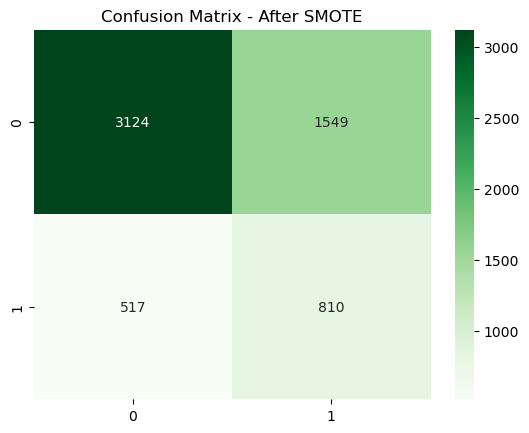

In [12]:
# Confusion matrix after SMOTE
cm_after = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_after, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - After SMOTE")
plt.show()


In [13]:
# Comparison summary table
comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall"],
    "Before SMOTE": [acc_before, prec_before, rec_before],
    "After SMOTE": [acc_after, prec_after, rec_after]
})

comparison


,Metric,Before SMOTE,After SMOTE
0,Accuracy,0.793500,0.655667
1,Precision,0.553012,0.343366
2,Recall,0.345893,0.610399


In [14]:
comparison.to_csv("results.csv", index=False)

In [18]:
"""
### Analysis

Before applying SMOTE, the KNN model showed high accuracy but low recall,
indicating poor detection of minority (default) cases.

After applying SMOTE, recall significantly improved, showing better
identification of defaulters, though accuracy slightly decreased.
This trade-off is expected in imbalanced classification problems and
indicates improved model fairness.
"""

'\n### Analysis\n\nBefore applying SMOTE, the KNN model showed high accuracy but low recall,\nindicating poor detection of minority (default) cases.\n\nAfter applying SMOTE, recall significantly improved, showing better\nidentification of defaulters, though accuracy slightly decreased.\nThis trade-off is expected in imbalanced classification problems and\nindicates improved model fairness.\n'